# DTSA 5509 Final Project - Supervised Learning on Caffeine Data

This notebook is part of the final project in course "DTSA 5509 - Introduction to Supervised Learning" of the Master of Science in Data Science degree at the CU Boulder.

The project consists of three parts:
*   Part 1 introduces and explores the dataset 
*   Part 2 trains and tunes supervised ML models for classification
*   Part 3 uses another supervised ML approach that enables "explainable AI", i.e. explaining what the model have learned

Each part starts with a few paragraphs of text on the method that was used and major findings. More detailed information can be found in the code, comments and printed outputs.

`TL;DR:` Some datasets have poor data quality (e.g. due to "fuzzy" labels), but with the right choice of algorithms there is still room for a meaningful data-driven analysis.


# Part 1: Introduction & Exploratory Data Analysis (EDA)

## Introduction

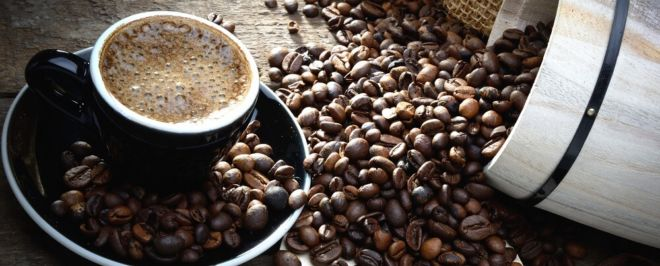

**Fig. 1:** A delicious cup of coffee (image [source](https://www.roastmarket.de/magazin/der-specialty-coffee/))

Coffee - that delicious hot brown bevearage has undoubtedly helped to shape our world. From great leaders to graduate students around the world, taking a coffee break is vital for the success of many projects. But nowadays, coffee is not just the "*a brewed drink prepared from roasted coffee beans*" ([Source](https://en.wikipedia.org/wiki/Coffee)), there are many [variations](https://www.tasteofhome.com/article/types-of-coffee/) to it: Americano, Espresso, Latte, Capuccino, Lungo, Cortado, Flat White, ...

However, not everyone who is tired or needs a break appreciates the taste of coffee. Tee lovers have been around every since, and more recently [Energy Drinks](https://en.wikipedia.org/wiki/Energy_drink) became popular. In addition to that, desert-like coffee specialities (think [Starbucks](https://www.starbucks.com/)), containing more sugar than caffeine, are around.

Therefore: **Classifying coffee is hard!** - and an interessting task for a small data science project.



## About the dataset

The dataset I will use in this project originates from [kaggle](https://www.kaggle.com/heitornunes/caffeine-content-of-drinks), the source can be found [here](https://www.caffeineinformer.com/the-caffeine-database). It consits of 610 different beverages from six categories (i.e. Coffee, Energy Drinks, Energy Shots, Soft Drinks, Tea, Water). Each sample consists of the name of the drink (e.g. *Costa Coffee*) along with its serving volume, calories and caffeine content. 

## EDA

The first step of the project is - as always - exploratory data analysis (EDA). We will look at the dataset from various perspectives, i.e. look at the first few rows of the dataset as well as summary statistics, check for missing values, check whether extreme data points are plausible, and visualize the dataset in a histogram.

From this analysis, it could be seen that the dataset is clean regarding missing values, so no imputation or similar methods were required. However, there are some peculiar data points, such as a coffee variation with over 1500 mg of caffeine. Assessing such odd data points is part of the data cleaning. In this case, an online research showed that all odd sample points were actually plausible (e.g. official product information could be found).

However, some issues with the category became apparent: There are, for example, samples classified as engery drinks, although containing zero caffeine. Also, the coffee category would put some coffee purists in despise, as some coffee-labeled samples contain little caffeine, but a lot of sugar and should be seen as a dessert instead of a coffe (for example *Arby's Jamocha Shake*).

This "fuzziness" is also reflected in the histograms and show how difficult this classification task is. Usually, coffee is a low-calories, high-caffeine beverage, but as previously mentioned, there are specialities with the other way around. Classic coffee should be seperable from energy drinks containing sugar, but diet energy drinks have the same properties. Therefore, the **distribution of energy drinks and coffee is very similar** in this dataset. From the histogram, only energy shots, soft drinks and water show distringuishable distributions. This is also reflected in the results of multiple **t-tests for differences in means**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read dataset
df = pd.read_csv("caffeine.csv")
df.head(10)

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
5,Espresso Monster,248.417400,170,160,Coffee
6,Dunkin Donuts Shot In The Dark,239.545350,80,134,Coffee
7,Illy Issimo Cafe,201.099800,45,155,Coffee
8,Starbucks Doubleshot Espresso,192.227750,140,120,Coffee
9,TrueStart Performance Coffee,150.824850,0,95,Coffee


In [ ]:
# descriptive statistics (numeric columns)
df.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [ ]:
# Get categories
df['type'].unique()

array(['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'], dtype=object)

In [ ]:
# check for missing values
df.isna().sum()

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

In [ ]:
# Plausibility check of salient samples

# Max. Calories value is plausible (https://topsecretrecipes.com/arbys-jamocha-shake-copycat-recipe.html)
print(df.iloc[df['Calories'].idxmax()])

# Caffeine
# usual caffeine per coffee 40 mg per 100 ml
# this one is particularly strong: https://www.caffeineinformer.com/caffeine-content/black-label
print(df.iloc[df['Caffeine (mg)'].idxmax()])

# Low calorie drinks are frequent, so nothing odd here
# Also, regular coffee should have 0 calories
print(df.iloc[df['Calories'].idxmin()])

# Here we see a little problem: An energy Drinks with 0 Caffeine?
# This is more like a diatery supplement drink
print(df.iloc[df['Caffeine (mg)'].idxmin()])

drink            Arby's Jamocha Shake
Volume (ml)                   473.176
Calories                          830
Caffeine (mg)                      12
type                           Coffee
Name: 37, dtype: object
drink            Black Label Brewed Coffee
Volume (ml)                        354.882
Calories                                 0
Caffeine (mg)                         1555
type                                Coffee
Name: 85, dtype: object
drink            Costa Coffee
Volume (ml)        256.993715
Calories                    0
Caffeine (mg)             277
type                   Coffee
Name: 0, dtype: object
drink            Propel Zero Powder
Volume (ml)                 473.176
Calories                          0
Caffeine (mg)                     0
type                  Energy Drinks
Name: 290, dtype: object


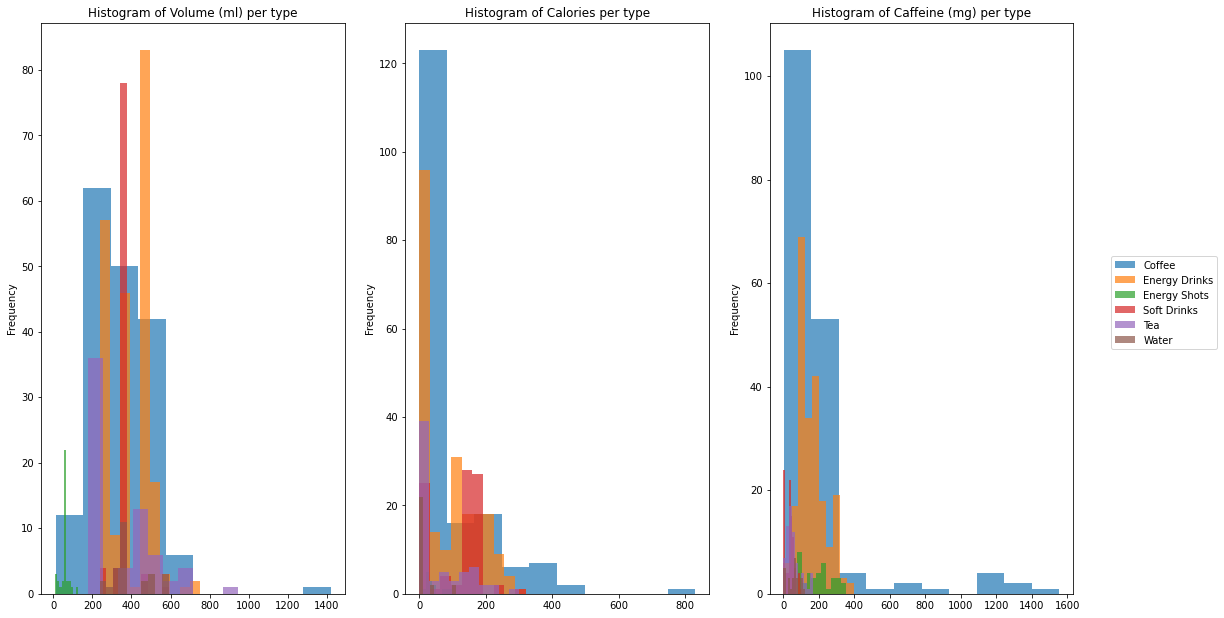

In [ ]:
# Plot histograms
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
feats = ['Volume (ml)', 'Calories', 'Caffeine (mg)']
for ax, feat in zip(axs, feats):
    for cat in df['type'].unique():
        x = df.loc[df.type==cat, feat]
        ax.hist(x, alpha=0.7, label=cat)
    ax.set(title='Histogram of {} per type'.format(feat), ylabel='Frequency')
ax.legend(loc='upper center',bbox_to_anchor=(1.3, 0.6));

## T-tests for difference in means (R Script)

To support the results from the EDA, namely that coffee and energy drinks have similar distributions, whereas other types such as energy shots have different distributions, multiple t-tests for differences in means were conducted at a significance threshold of `alpha = 0.05`. To avoid inflating type I error, Bonferroni correction has been applied, resulting in `alpha_cor = 0.01` for 5 hypothesis tests.

The following tests and results can be reported:
```
Accepted Hypotheses:
Coffee vs. Energy Shots       - Volume:    p-value = 0.0000
Coffee vs. Soft Drinks        - Calories:  p-value = 0.0025
Coffee vs. Energy Drinks      - Caffeine:  p-value = 0.0077

Rejected Hypothesis:
Coffee vs. Energy Drinks      - Calories:  p-value = 0.2308
Energy Drinks vs. Soft Drinks - Calories:  p-value = 0.0166
```

The hypothesis tests support the statement from above, i.e. distinguishing between coffee and energy drinks will be harder than separating those two categories from the "rest", such as soft drinks. Although there is a significant difference in means of caffeine between coffee and energy drinks, which is surprising.

The detailed analysis can be found in the `EDA.R` script in this repository. 

# Part 2: Train and tune supervised ML models

Based on the EDA it could be concluded that the classification task will be difficult. Nevertheless, three types of ML algorithms for classification were trained in the first place, i.e.:

*   A non-linear support vector machine
*   A random forest classifier
*   A (shallow) neural network (multilayer perceptron)

For the final model evaluation, an 80/20 train-test split was applied. Then, the models were trained and tuned using grid search with three cross-validation folds.

The following test set accuracies could be achieved with the best models, respectively:

```
Test set accuracies of final models:
* Support Vector Classifier: 0.533
* Random Forest:             0.582
* Multilayer Perceptron:     0.500
```

It can be seen that the overall accuracy is not really satisfying. The best algorithm is able to classifly around 58.2% of the data correctly. This was already expected in the data exploration phase. As discussed above, the main problem is the distribution of what is labelled as "coffee". Is a drink containing mostly cream and sugar with just a pinch of brewed coffee really a "coffee"? If so, the provided features in the dataset are not enough to distinguish between the different classes and more features should be collected (e.g. recommended drinking temperature). 

However, the third and final section will reveal that even in the field of supervised learning algorithms, the choice which algorithm should be used is not arbitrary - especially if there are data quality concerns.





In [ ]:
# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# Train-Test Split
X = df.iloc[:,1:4]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SVC Classifier

In [ ]:
# SVC Classifier
c_logspace = [2**(-5), 2**(-3), 2**(-1), 2**(1), 2**(3), 2**(5)]
gamma_linspace = np.linspace(2**(-5), 2**5, 5).tolist()
grid = {'C': c_logspace,
       'gamma': gamma_linspace}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, grid, cv=3)
grid = clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)
best_svc = SVC(kernel='rbf', C=32, gamma=0.03125)
scores = cross_val_score(best_svc, X_train, y_train, cv=3)
print('cross-val mean accuracy: {:.3f}'.format(np.mean(scores)))

{'C': 32, 'gamma': 0.03125}
cross-val mean accuracy: 0.525


## RandomForest

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(rf, X_train, y_train, cv=3)
print('cross-val mean accuracy: {:.3f}'.format(np.mean(scores)))

cross-val mean accuracy: 0.598


## Shallow Neural Network (Multilayer Perceptron)

In [ ]:
grid = {
    'hidden_layer_sizes': [(16,8), (8,8,4)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
mlp = MLPClassifier(max_iter=2000)
clf = GridSearchCV(mlp, grid, cv=3)
grid = clf.fit(X_train, y_train)
print(clf.best_params_)

C:\ProgramData\Miniconda3\envs\py39_jupyterlab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'alpha': 0.0001, 'hidden_layer_sizes': (16, 8), 'learning_rate_init': 0.001}


In [ ]:
best_mlp = MLPClassifier(max_iter=2000,alpha=0.0001, hidden_layer_sizes=(16,8), learning_rate_init=0.001)
scores = cross_val_score(best_mlp, X_train, y_train, cv=3)
print('cross-val mean accuracy: {:.3f}'.format(np.mean(scores)))

cross-val mean accuracy: 0.586


## Test Set Accuracies

In [ ]:
svc_score = best_svc.fit(X_train, y_train).score(X_test, y_test)
rf_score = rf.fit(X_train, y_train).score(X_test, y_test)
mlp_score = best_mlp.fit(X_train, y_train).score(X_test, y_test)
print('svc: {0:.3f}, rf: {1:.3f}, mlp: {2:.3f}'.format(svc_score, rf_score, mlp_score))

svc: 0.533, rf: 0.582, mlp: 0.500


# Part 3: Why the choice of the algorithm matters (explainable AI)

The fact that the label is not a good or, more specifically, exhaustive representation for the sample (see above) requires to think more carefully about the choice of the learning algorithm. Training an arbitrary ML classification algorithm will not lead to any satisfying results, but choosing the algorithm wisely will enhance the classification task.

The main issue is: How does the algorithm make its decisions? Simply predicting the class probabilities is not useful here, since the overall prediction accuracy is low. The algorithm would require to "explain" how the decision was made, and there is a whole world of research going on in the field of explainable AI (XAI) or interpretable machine learning, respectively (IML, e.g.: [here](https://christophm.github.io/book/)).

However, there is one family of supervised learning algorithms that explains the prediction for free - without the use of fancy XAI techniques: To the rescue comes **KNN** (k nearest neighbor).

The KNN classifier calculates the distance between the sample of interest and the k nearest samples in the training set. The final prediction is, for example, based on a majority vote (which is why k should be an odd number). But, more importantly, KNN can also output those nearest neighbors and, therefore, **explain** why a certain prediction has been made. This property makes KNN so powerful when used with a "fuzzy" labelled dataset.

Training a KNN classifier yields a test set accuracy of around 68.9%. This is already superior to all the other classifiers trained in part 2, by a margin of over 10%! However, there is even more to it. Since KNN can explain the predictions by outputting the nearest neighbors, misclassifications or fuzzy predictions can be understood even better.

This is best shown with the following example (code below): The *Starbucks Grande Caffe Latte* is missclassified as Energy Drink. Explaining this prediction using KNN shows why: Besides having a typical caffeine level, it also has lots of calories. On the other hand, classic coffee beverages are classified correctly because of the large similarities between them. 

So, while the overall prediction accuracy is still fairly low, the additional information provided by KNN compensates some of the data quality related issues this dataset has. 

To sum it up: Some datasets have poor data quality (e.g. due to "fuzzy" labels), but with the right choice of algorithms there is still room for a meaningful data-driven analysis.


## Train KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('KNN train score: {0:.3f}, test score: {1:.3f}'.format(
    knn.score(X_train, y_train),
    knn.score(X_test, y_test)))

KNN train score: 0.809, test score: 0.689


## Explainable AI on some examples

### True prediction of classic coffee

In [ ]:
print('---- Predicted Data ----')
n_sample = 10
print(df.iloc[n_sample,:])
neigh_dist, neigh_idces = knn.kneighbors(df.iloc[n_sample:n_sample+1,1:4])
for idx, dist in zip(neigh_idces[0], neigh_dist[0]):
    print('---- Neighbours (idx: {0:.0f}) ----'.format(idx))
    print(df.iloc[idx,:])

---- Predicted Data ----
drink            Bizzy Cold Brew
Volume (ml)            78.961245
Calories                       0
Caffeine (mg)                125
type                      Coffee
Name: 10, dtype: object
---- Neighbours (idx: 133) ----
drink            Folgers Coffee
Volume (ml)             236.588
Calories                      0
Caffeine (mg)               112
type                     Coffee
Name: 133, dtype: object
---- Neighbours (idx: 128) ----
drink            Death Wish Canned Cold Brew
Volume (ml)                          236.588
Calories                                  15
Caffeine (mg)                            300
type                                  Coffee
Name: 128, dtype: object
---- Neighbours (idx: 48) ----
drink            Panera Bread Coffee
Volume (ml)                  473.176
Calories                          15
Caffeine (mg)                    189
type                          Coffee
Name: 48, dtype: object


### False prediction of fancy coffee variant (high calories)

In [ ]:
print('---- Predicted Data ----')
n_sample = 61
print(df.iloc[n_sample,:])
neigh_dist, neigh_idces = knn.kneighbors(df.iloc[n_sample:n_sample+1,1:4])
for idx, dist in zip(neigh_idces[0], neigh_dist[0]):
    print('---- Neighbours (idx: {0:.0f}) ----'.format(idx))
    print(df.iloc[idx,:])

---- Predicted Data ----
drink            Starbucks Grande Caffe Latte
Volume (ml)                           473.176
Calories                                  190
Caffeine (mg)                             150
type                                   Coffee
Name: 61, dtype: object
---- Neighbours (idx: 386) ----
drink            Perk Energy Beverage
Volume (ml)                   236.588
Calories                           90
Caffeine (mg)                     100
type                    Energy Drinks
Name: 386, dtype: object
---- Neighbours (idx: 157) ----
drink            Voila Instant Coffee
Volume (ml)                   236.588
Calories                            0
Caffeine (mg)                     100
type                           Coffee
Name: 157, dtype: object
---- Neighbours (idx: 352) ----
drink            Kona Gold Energy Drink
Volume (ml)                     354.882
Calories                            150
Caffeine (mg)                       115
type                      Energy Dr

## Confusion matrix

Another way to assess the algorithm is to plot a confusion matrix. The following code does so, and supports the thesis that coffee and energy drinks are confused the most. Due to the caffeine level and similar volume, there is also a noticable missclassification between coffee and tea. Energy Shots are the only class in the test set where no missclassification happened.

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,
                 knn.predict(X_test),
                 labels=['Coffee', 'Energy Drinks', 'Soft Drinks', 
                         'Energy Shots', 'Tea', 'Water'])

array([[25, 11,  0,  1,  1,  0],
       [ 5, 33,  0,  0,  4,  3],
       [ 1,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 4,  1,  2,  0,  9,  0],
       [ 0,  1,  3,  0,  1,  1]])